In [1]:
import pandas as pd
import sys
import missingno as msno
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from haversine import haversine, Unit

from optional.data_processing import *


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


df_all_housing_info = pd.read_csv('data/eda.csv')
df_all_housing_info.isna().sum()
#type(df_all_housing_info['date'][2])

df_all_housing_info


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,1530.0,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,2310.0,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,1020.0,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,1600.0,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0


In [2]:
df_all_housing_info['date'] = pd.to_datetime(df_all_housing_info['date'])
type(df_all_housing_info['date'][2])


pandas._libs.tslibs.timestamps.Timestamp

In [3]:
df_all_housing_info.groupby('id')['date'].count().sort_values(ascending=False)

id
795000620     3
9136103130    2
3630120700    2
8651510380    2
2212200100    2
             ..
2767800140    1
2767800065    1
2767705010    1
2767704860    1
2768100180    1
Name: date, Length: 21420, dtype: int64

In [4]:
my_ser =df_all_housing_info.groupby('id')['date'].count()
my_ser[my_ser>1].shape

(176,)

In [5]:
zip_houses = df_all_housing_info.groupby('zipcode')['price'].mean().round(1)
zip_houses

zipcode
98001     281194.9
98002     234284.0
98003     294111.3
98004    1356524.0
98005     810289.7
98006     859938.6
98007     617254.0
98008     645628.2
98010     423666.0
98011     490377.1
98014     455617.1
98019     424815.1
98022     316742.4
98023     286742.8
98024     586120.9
98027     617054.0
98028     462488.9
98029     612642.7
98030     296188.0
98031     300340.4
98032     251296.2
98033     803990.8
98034     521740.0
98038     367091.5
98039    2161300.0
98040    1194873.6
98042     311580.3
98045     440232.3
98052     645244.2
98053     677215.0
98055     304262.1
98056     420895.5
98058     353619.1
98059     493625.3
98065     529629.8
98070     489382.0
98072     570073.5
98074     685675.8
98075     790734.7
98077     682886.0
98092     334921.1
98102     899607.7
98103     585048.8
98105     863228.9
98106     319581.4
98107     579109.8
98108     355678.5
98109     880077.8
98112    1096239.0
98115     619944.1
98116     618695.1
98117     576834.8
9811

In [86]:
# def calc_season(date):
#     day = date.day
#     month = date.month


#     if (3== month and day >21) or (3<month<6) or (6== month and day<22):
#         return 'spring'
#     elif (6== month and day >21) or (6<month<9) or (9== month and day<22):
#         return 'summer'
    
#     elif (9== month and day >21) or (9<month<12) or (9== month and day<22):
#         return 'autumn'
#     else:
#         return 'winter'
    

def calc_season(date):
    day = date.day
    month = date.month

    if month==1:
        return 1
    elif month==2:
        return 2
    elif month==3:
        return 3
    elif month==4:
        return 4
    elif month==5:
        return 5
    elif month==6:
        return 6
    elif month==7:
        return 7
    elif month==8:
        return 8
    elif month==9:
        return 9
    elif month==10:
        return 10
    elif month==11:
        return 11
    else:
        return 12

    
    

    
season_df = df_all_housing_info.copy()
season_df['season']= season_df['date'].apply(calc_season)

season_df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,season
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,10
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,12
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,2
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,12
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,1530.0,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,5
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,2310.0,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,2
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,1020.0,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,6
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,1600.0,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,1


In [87]:
result2_df =season_df.groupby('season')['price'].mean().reset_index()
result2_df
#sns.lineplot(data=season_df, x='season',y='p')

,season,price
0,1,525963.251534
1,2,508520.051323
2,3,544057.683200
3,4,562215.615074
4,5,550849.746893
5,6,557534.318182
6,7,544892.161013
7,8,536655.212481
8,9,529723.517787
9,10,539439.447228


In [88]:
result_df=season_df.groupby(['zipcode','season'])['price'].mean().round(0)
result_df=result_df.reset_index()
result_df.columns = ['zipcode','season','price']
result_df
# #second groupby
# result_df=result_df.groupby('season')['price'].mean().round()
# result_df=result_df.reset_index()
# result_df.columns = ['season','price']

,zipcode,season,price
0,98001,1,278641.0
1,98001,2,292197.0
2,98001,3,266790.0
3,98001,4,335834.0
4,98001,5,253686.0
...,...,...,...
832,98199,8,826836.0
833,98199,9,883140.0
834,98199,10,814247.0
835,98199,11,662598.0


In [97]:
#result_df =result_df.reset_index()
#result_df
#sns.barplot(data=result_df, x='season', y='price', hue='zipcode', legend=False)
#sns.lineplot(data=result_df, x='season', y='price', hue='zipcode', marker='o')

result_seas= result_df.groupby('season')['price'].mean().reset_index()
result_df
result_seas
ratio = (result_seas.price.max()- result_seas.price.min() )/result_seas.price.max()
ratio
#result_seas['price'].max()

np.float64(0.08755749134860435)

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


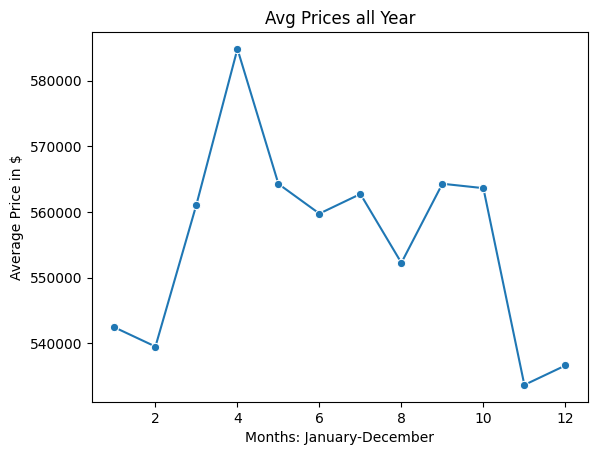

In [112]:
sns.lineplot(data=result_seas, x='season', y='price', marker='o')
plt.xlabel('Months: January-December')
plt.ylabel('Average Price in $')
plt.title('Avg Prices all Year')

plt.savefig('data/months_average_over_all.png', dpi=300, bbox_inches='tight')
plt.show()

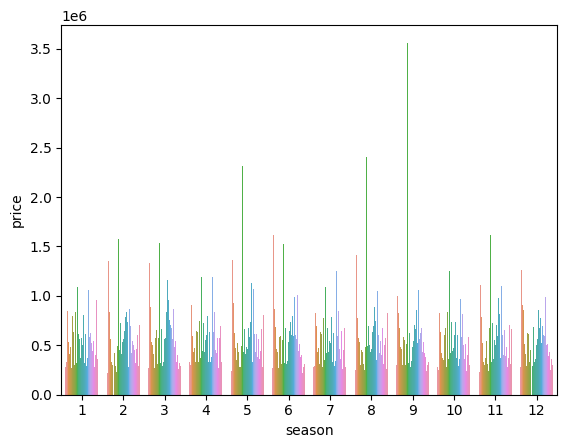

In [102]:
result_df
#sns.lineplot(data=result_df, x='season', y='price', hue='zipcode', marker='o')

sns.barplot(data=result_df, x='season', y='price', hue='zipcode')
plt.legend().remove()

#sns.barplot(data=result_df, x='season', y='price')



In [73]:
#season_df.groupby(['zipcode','season'])['price'].filter(lambda x: len(x) >= 50)
season_df.groupby(['zipcode','season']).size()
season_df.reset_index()

,index,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,season
0,0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,december
1,1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,december
2,2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,february
3,3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,december
4,4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,february
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,1530.0,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,december
21593,21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,2310.0,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,february
21594,21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,1020.0,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,december
21595,21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,1600.0,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,january


In [74]:
df_all_housing_info.date.max()

Timestamp('2015-05-27 00:00:00')

In [107]:
df_all_housing_info.price.sort_values().tail(30)

18462    3300000.0
14070    3300000.0
18288    3300000.0
20444    3350000.0
7982     3400000.0
10435    3400000.0
13954    3400000.0
5874     3420000.0
21560    3570000.0
2862     3600000.0
15241    3640000.0
19133    3640000.0
18467    3650000.0
6502     3650000.0
16288    3710000.0
19002    3800000.0
7028     3800000.0
2083     3850000.0
4145     4000000.0
12358    4210000.0
8629     4490000.0
2624     4500000.0
8085     4670000.0
1162     5110000.0
1313     5300000.0
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, dtype: float64

/home/mahaeu/Exercises/Spiced_Projects/eda-housing-data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

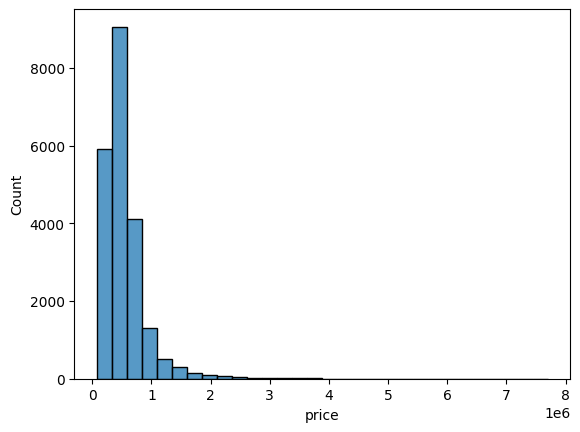

In [ ]:
df_tinker =df_all_housing_info.copy()

df_tinker = df_tinker['price'<1000000]
sns.histplot(data=df_all_housing_info, x='price', bins=30)